In [ ]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
papers = pd.read_csv("/content/3_eligible_publications_narrow.csv", encoding='latin1')
papers

,Journal,Title,DEC,Tag1,Tag2,Authors,Year,Abstract,Paper_type,Affiliations
0,Journal of Parasitology Research,Larvicidal Activity against Aedes aegypti and ...,A,1C,Algae,"Guedes, ElÃÂ­ca Amara CecÃÂ­lia; de Carvalho...",2014,This study investigated the biological activit...,['Journal Article'],"['LaboratÃÂ³rio de Produtos Naturais, Institu..."
1,Marine Drugs,Biological Activities and Chemical Composition...,A,1A,Algae,"Pereira, Hugo; CustÃ³dio, LuÃ­sa; Rodrigues, M...",2015,Four lipid-rich microalgal species from the Re...,['Journal Article'],"['Centre of Marine Sciences, University of Alg..."
2,Marine Drugs,The Brown Alga Stypopodium zonale (Dictyotacea...,A,1A,Algae,"Soares, Deivid Costa; Szlachta, Marcella Maced...",2016,This study evaluated the anti-Leishmania amazo...,['Journal Article'],"['Instituto de Microbiologia Paulo de GÃ³es, U..."
3,Marine Drugs,"Spiralyde A, an Antikinetoplastid Dolabellane ...",A,1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Lorenzo-Morales,...",2019,Bioassay-guided fractionation of the antikinet...,['Journal Article'],['Instituto Universitario de Bio-OrgÃÂ¡nica A...
4,Parasites & Vectors,Apoptosis-like cell death upon kinetoplastid i...,A,1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Abderrabba, Mane...",2021,Background: The in vitro activity of the brown...,['Journal Article'],['grid.10041.340000000121060879Instituto Unive...
...,...,...,...,...,...,...,...,...,...,...
413,Plants,In Vitro Antiprotozoal Activity of Schinus mol...,A,1A,Plant extract,"RodrÃ­guez-Garza, Nancy E.; Quintanilla-Licea,...",2024,"Chagas disease, caused by the protozoan Trypan...",['Journal Article'],['Laboratorio de PatologÃ­a Molecular y Experi...
414,Tropical Parasitology,Investigation the effect of the aqueous extrac...,A,1A,Plant extract,"Ghusoon, A. A Al-Maphregy; Buthaina, A. H. Al-...",2024,Background:: Visceral leishmaniasis (VL) is a ...,['Journal Article'],"['Department of Biology, College of Education ..."
415,Heliyon,Leishmanicidal and immunomodulatory activity o...,A,1A,Plant extract,"de AraÃºjo, Sandra Alves; Silva, Carla Maria P...",2024,Leishmaniases are infectious-parasitic disease...,['Journal Article'],"['Rede Nordeste de Biotecnologia, Universidade..."
416,BMC Complementary Medicine and Therapies,Therapeutic potential of Indonesian plant extr...,A,1A,Plant extract,"Sari, Defi Kartika; Jeelani, Ghulam; Ilmi, Hil...",2024,Background: Neglected tropical diseases (NTDs)...,['Journal Article'],['https://ror.org/04ctejd88grid.440745.60000 0...


In [ ]:
# Define the classification function
def classify_labels(text):
    labels = []
    patterns = {
        "Trypanosoma": [
             r"(?i)Trypanosoma brucei brucei", r"(?i)Trypanosoma brucei", r"(?i)Trypanosoma cruzi",
            r"(?i)Trypanosoma congolense",  r"(?i)T. brucei rhodesiense", r"(?i)Trypanosoma brucei rhodesiense",
              r"(?i)Trypanosoma brucei gambisense", r"(?i)T. brucei gambisense", r"(?i)Trypanosoma spp.", r"(?i)Trypanosoma sp", r"(?i)T. cruzi",
             r"(?i)T. brucei", r"(?i)T. congolense", r"(?i)T. b. gambisense", r"(?i)T. b. rhodesiense", r"(?i)T. brucei rhodesiense",
              r"(?i)T. brucei brucei", r"(?i)T. b. brucei", r"(?i)T. brucei gambisense", r"(?i)Trypanosoma vivax", r"(?i)T. vivax"
        ],
        "Leishmania": [
              r"(?i)Leishmania donovani",  r"(?i)L. amazonensis", r"(?i)L. infantum",  r"(?i)Leishmania amazonensis",
              r"(?i)Leishmania mexicana Mexicana",  r"(?i)Leishmania mexicana", r"(?i)Leishmania braziliensis",
              r"(?i)Leishmania enriettii",  r"(?i)Leishmania major",  r"(?i)Leishmania spp", r"(?i)Leishmania Tropica",
              r"(?i)Leishmania tropica",  r"(?i)Leishmania tarentolae",  r"(?i)L. chagasi", r"(?i)Leishmania chagasi",
              r"(?i)L. pifanoi",  r"(?i)Leishmania pifanoi", r"(?i)Leishmania sp", r"(?i)L. major", r"(?i)L. donovani", r"(?i)L. amazonensis",
              r"(?i)L. mexicana Mexicana", r"(?i)L. mexicana", r"(?i)L. braziliensis",  r"(?i)L. enriettii", r"(?i)Leishmania infantum"
        ],
        "Schistosoma": [
            r"(?i)Schistosoma mansoni", r"(?i)Schistosoma haematobium", r"(?i)S. japonicum", r"(?i)Schistosoma japonicum",
            r"(?i)Schistosoma spp", r"(?i)S. mansoni", r"(?i)S. haematobium", r"(?i)Schistosoma sp", r"(?i)Schistosoma mekongi", r"(?i)S. mekongi",
        ],
        "Sarcoptes": [
             r"(?i)Sarcoptes scabiei", r"(?i)S. scabiei", r"(?i)Sarcoptes spp", r"(?i)Sarcoptes spp.", r"(?i)Sarcoptes sp"
        ],
        "Onchocerca": [
             r"(?i)Onchocerca volvulus",  r"(?i)Onchocerca ochengi", r"(?i)Onchocerca spp", r"(?i)Onchocerca spp.", r"(?i)Onchocerca sp"
        ],
        "Echinococcus": [
             r"(?i)Echinococcus granulosus", r"(?i)E. granulosus",  r"(?i)Echinococcus multilocularis",  r"(?i)Ec. multilocularis",
              r"(?i)Echinococcus protoscoleces", r"(?i)Ec. protoscoleces", r"(?i)Echinococcus spp", r"(?i)Echinococcus sp", r"(?i)protoscolices",
              r"(?i)E. multilocularis", r"(?i)E. protoscoleces"
        ],
        "Fasciola": [
             r"(?i)Fasciola spp", r"(?i)Fasciola gigantica", r"(?i)Fasciola hepatica", r"(?i)F. gigantica", r"(?i)F. hepatica", r"(?i)Fasciola sp"
        ],
        "Brugia": [
            r"(?i)Brugia pahangi", r"(?i)Brugia spp", r"(?i)Brugia spp.", r"(?i)B. pahangi", r"(?i)B. malayi", r"(?i)Brugia malayi", r"(?i)Brugia sp"
        ],
        "Taenia": [
            r"(?i)Taenia solium", r"(?i)Taenia spp.", r"(?i)T. solium", r"(?i)Taenia sp"
        ],
        "Trichuris": [
            r"(?i)Trichuris trichiura", r"(?i)T. trichiura", r"(?i)Trichuris spp", r"(?i)Trichuris spp.", r"(?i)Trichuris sp"
        ],
        "Ancylostoma": [
            r"(?i)Ancylostoma ceylanicum", r"(?i)A. ceylanicum", r"(?i)Ancylostoma spp", r"(?i)Ancylostoma spp.", r"(?i)Ancylostoma sp"
        ],
        "Strongyloides": [
            r"(?i)Strongyloides ratti", r"(?i)S. ratti", r"(?i)Strongyloides", r"(?i)Strongyloides stercoralis", r"(?i)S. stercoralis"
        ],
        "Ascaris": [
             r"(?i)Ascaris lumbricoides", r"(?i)A. lumbricoides", r"(?i)Ascaris spp", r"(?i)Ascaris spp.", r"(?i)Ascaris suum", r"(?i)Ascaris sp"
        ],
        "Tunga": [
             r"(?i)Tunga penetrans", r"(?i)T. penetrans", r"(?i)Tunga spp", r"(?i)Tunga spp.", r"(?i)Tunga sp"
        ],
        "Culex": [
              r"(?i)Culex spp", r"(?i)Culex spp.", r"(?i)Culex sp", r"(?i)Culex quinquefasciatus", r"(?i)C. quinquefasciatus", r"(?i)Culex antennatus",
              r"(?i)Cx. quinquefasciatus",  r"(?i)Cx. vishnui", r"(?i)Culex vishnui", r"(?i)C. vishnui", r"(?i)Culex pipiens", r"(?i)Cx. pipiens.",
        ],
        "Anopheles": [
              r"(?i)Anopheles funestus", r"(?i)A. funestus", r"(?i)Anopheles spp", r"(?i)Anopheles spp.", r"(?i)Anopheles sp", r"(?i)Anopheles gambiae",
              r"(?i)Anopheles pharoensis", r"(?i)A. gambiae", r"(?i)A. pharoensis", r"(?i)An. stephensi", r"(?i)Anopheles stephensi", r"(?i)Anopheles subpictus",
              r"(?i)An. subpictus"
        ],
        "Aedes": [
              r"(?i)Ae. Vittatus", r"(?i)Aedes albopictus", r"(?i)Aedes sp", r"(?i)Aedes spp", r"(?i)Stegomyia aegypti", r"(?i)Aedes aegypti", r"(?i)Ae. aegypti"
        ],
        "Biomphalaria": [
              r"(?i)Biomphalaria glabrata", r"(?i)Biomphalaria spp", r"(?i)B. glabrata", r"(?i)Biomphalaria pfeifferi", r"(?i)B. pfeifferi", r"(?i)Biomphalaria sp",
              r"(?i)Biomphalaria alexandrina"
        ],
        "Oncomelania": [
            r"(?i)Oncomelania hupensis", r"(?i)O. hupensis", r"(?i)Oncomelania spp", r"(?i)Oncomelania spp.", r"(?i)Oncomelania sp"
        ],
        "Lymnaea": [
             r"(?i)Lymnaea acuminata", r"(?i)L. acuminata", r"(?i)Lymnaea spp", r"(?i)Lymnaea spp.", r"(?i)Lymnaea sp"
        ],
        "Bulinus": [
             r"(?i)Bulinus species", r"(?i)Bulinus spp.", r"(?i)Bulinus sp", r"(?i)Bulinus"
        ],
        "Bioanalytical": [
            r"(?i)HPLC", r"(?i)LC/MS", r"(?i)mass spectrometry", r"(?i)GC-MS", r"(?i)TLC", r"(?i)HRESI-LCMS", r"(?i)gas chromatography-mass spectroscopy",
            r"(?i)high performance liquid chromatography", r"(?i)bioassay-guided fractionation", r"(?i)HR/MS", r"(?i)UHPLC/+ESI-QqTOF-MS/MS", r"(?i)GCâ€“MS",
            r"(?i)Preparative thin-layer chromatography", r"(?i)HRESI-MS", r"(?i)Gas-Liquid-Chromatography", r"(?i)hybrid Mass-Spectrophotometer",
             r"(?i)Bioactivity-guided chromatographic fractionation", r"(?i)preparative chromatography", r"(?i)UHPLC-QTOF-MS",
            r"(?i)Bioassay guided fractionation", r"(?i)chromatographic fractionation", r"(?i)MS", r"(?i)bioguided fractionation", r"(?i)GC-FID", r"(?i)HRMS",
            r"(?i)GC/MS", r"(?i)gas chromatographyâ€“mass spectrometry", r"(?i)GCâ€“MS", r"(?i)Electrophoretic", r"(?i)electrophoresis", r"(?i)protein profiling",
            r"(?i)Bioassay-guided", r"(?i)HRESITOF", r"(?i)UPLC-HRMS/MS", r"(?i)Bioactivity-guided", r"(?i)chromatographic"
        ],
        "Biophysical": [
            r"(?i)NMR", r"(?i)IR", r"(?i)FTIR", r"(?i)RMN", r"(?i)Confocal laser scanning microscopy", r"(?i)field emission scanning electron microscopy", r"(?i)FE-SEM",
            r"(?i)XRD", r"(?i)X-ray diffraction", r"(?i)inverted optical microscope",  r"(?i)Fluorescence microscopic analysis", r"(?i)infrared analysis", r"(?i)VCD analyses",
            r"(?i)light microscopy", r"(?i)transmission and scanning electron microscopy", r"(?i)infrared analysis", r"(?i)transmission electronic microscope", r"(?i)TEM",
            r"(?i)ultrastructural changes"
        ],
        "Biochemical": [
            r"(?i)MTT", r"(?i)Resazurin reduction assay", r"(?i)cytotoxicity", r"(?i)MTT/formazan", r"(?i)MTS", r"(?i)annexin", r"(?i)colorimetric assay",
            r"(?i)Resazurin Microtiter Assay", r"(?i)XTT", r"(?i)trypan blue", r"(?i)alamar blue", r"(?i)Flow cytometry"
        ],
        "Molecular": [
               r"(?i)PCR", r"(?i)qPCR", r"(?i)RNA expression", r"(?i)RNA seq", r"(?i)Transcriptomic analysis"
        ],
        "Metabolomics": [
            r"(?i)metabolite profiling", r"(?i)metabolomics", r"(?i)metabolic profile", r"(?i)metabolome"
        ],
        "In silico": [
             r"(?i)molecular docking", r"(?i)partial least squares", r"(?i)insilico", r"(?i)Computational quantum chemistry", r"(?i)Molecular dynamics",
             r"(?i)ADMET", r"(?i)ADME", r"(?i)Virtual screening", r"(?i)Docking", r"(?i)Protein-ligand docking", r"(?i)Molecular dynamics simulations"
        ]
    }
    for label, regex_list in patterns.items():
        if any(re.search(pattern, text) for pattern in regex_list):
            labels.append(label)
    return labels

In [ ]:
# Apply the classification to the Abstract column
if "Abstract" in papers.columns:
    papers["Labels"] = papers["Abstract"].fillna("").apply(classify_labels)
else:
    print("Error: The 'Abstract' column does not exist in the DataFrame.")

In [ ]:
# Explode the labels into multiple rows for easier counting
papers = papers.explode("Labels")

In [ ]:
# Define the labels and year range for the heatmap
#selected_labels = ["Trypanosoma", "Leishmania", "Schistosoma", "Strongyloides", "Onchocerca", "Echinococcus", "Fasciola", "Brugia", "Taenia", "Trichuris", "Ancylostoma", "Ascaris", "Tunga"]
#selected_labels = ["Culex", "Anopheles", "Aedes", "Biomphalaria", "Oncomelania", "Lymnaea", "Bulinus"]
selected_labels = ["Bioanalytical", "Biophysical", "Biochemical", "Molecular", "Metabolomics", "In silico"]
year_range = range(2000, 2025)

In [ ]:
# Filter the data for selected labels and year range
filtered_data = papers[(papers["Labels"].isin(selected_labels)) & (papers["Year"].isin(year_range))]

# Group by Year and Labels for heatmap data preparation
if "Year" in filtered_data.columns:
    heatmap_data = filtered_data.groupby(["Year", "Labels"]).size().unstack(fill_value=0)
else:
    print("Error: The 'Year' column does not exist in the DataFrame.")

In [ ]:
# Ensure years within the desired range appear in the heatmap
#heatmap_data = heatmap_data.reindex(year_range, fill_value=0)

# Plot the horizontal heatmap
#plt.figure(figsize=(12, 2), dpi=200)
#sns.heatmap(heatmap_data.T, cmap="inferno", annot=False, fmt="d", cbar=True, linewidths=1.5)
#plt.title("Horizontal Heatmap of Trypanosoma and Bioanalytical Labels by Year (2010-2024)")
#plt.xticks(rotation=45,ha='right', fontsize=12)  # Rotate x-axis labels for clarity
#plt.yticks(rotation=360, ha='right', fontsize=14)  # Rotate x-axis labels for clarity
#plt.xlabel("Year", fontsize=14)
#plt.ylabel("Labels", fontsize=14)
#plt.tight_layout()
#plt.show()

METHODS

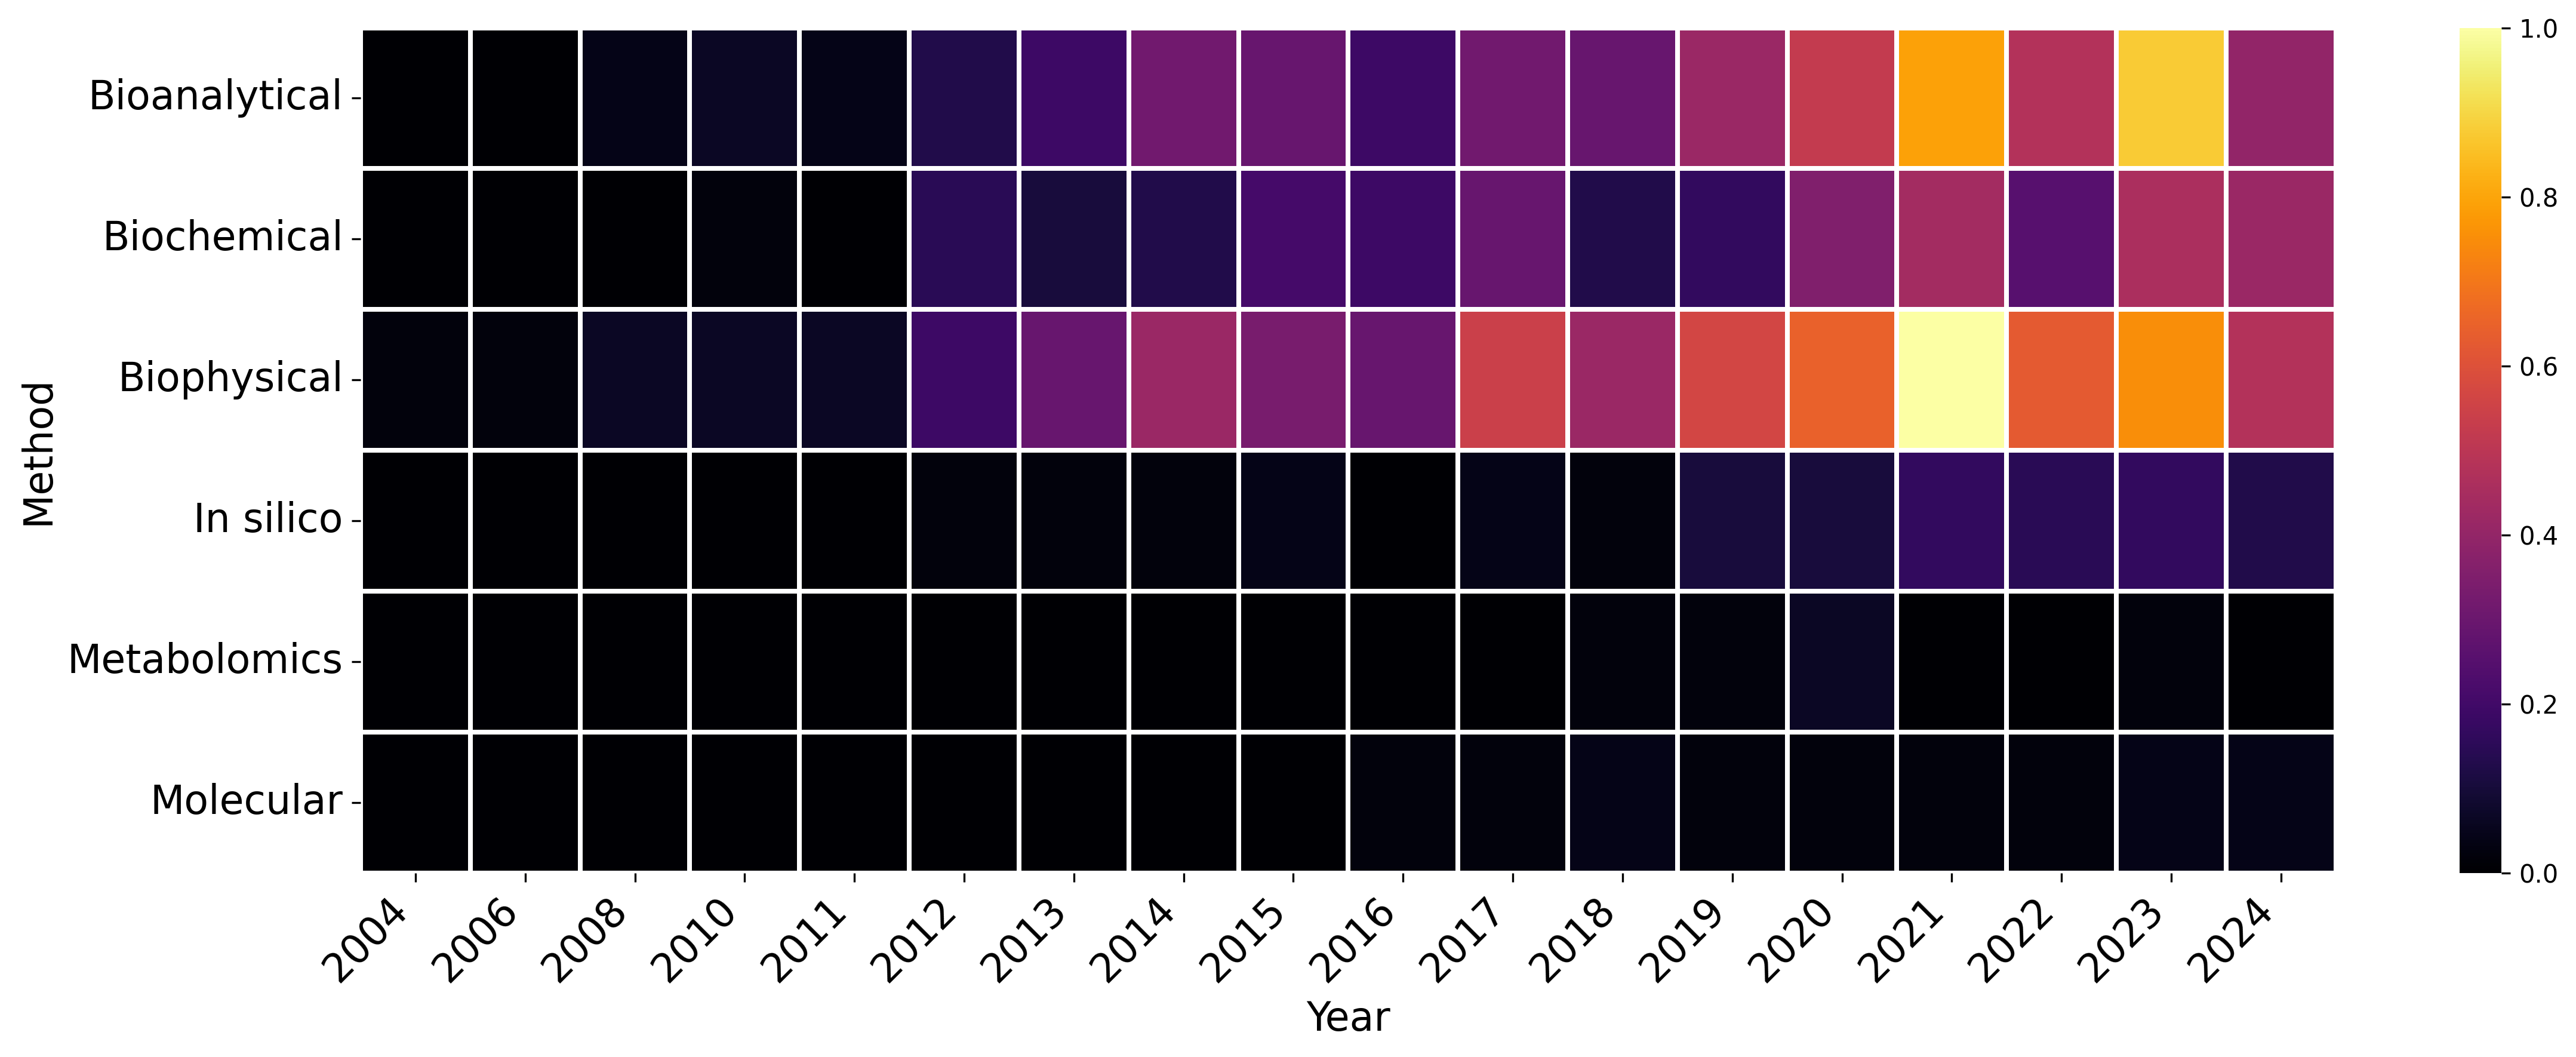

In [ ]:
# Normalize the data to 0-1 range without changing the visualization
min_val = heatmap_data.min().min()
max_val = heatmap_data.max().max()

# Avoid division by zero if min_val and max_val are the same
if min_val == max_val:
  normalized_heatmap_data = heatmap_data
else:
  normalized_heatmap_data = (heatmap_data - min_val) / (max_val - min_val)


# Plot the horizontal heatmap with normalized data
plt.figure(figsize=(16, 6), dpi=300)
sns.heatmap(normalized_heatmap_data.T, cmap="inferno", annot=False, fmt=".2f", cbar=True, linewidths=1.5, vmin=0, vmax=1) # Set vmin and vmax for colorbar
#plt.title("Horizontal Heatmap of Trypanosoma and Bioanalytical Labels by Year (2010-2024)")
plt.xticks(rotation=45,ha='right', fontsize=16)  # Rotate x-axis labels for clarity
plt.yticks(rotation=360, ha='right', fontsize=16)  # Rotate x-axis labels for clarity
plt.xlabel("Year", fontsize=16)
plt.ylabel("Method", fontsize=16)
plt.rcParams["font.family"] = "Arial"
plt.tight_layout()
plt.show()

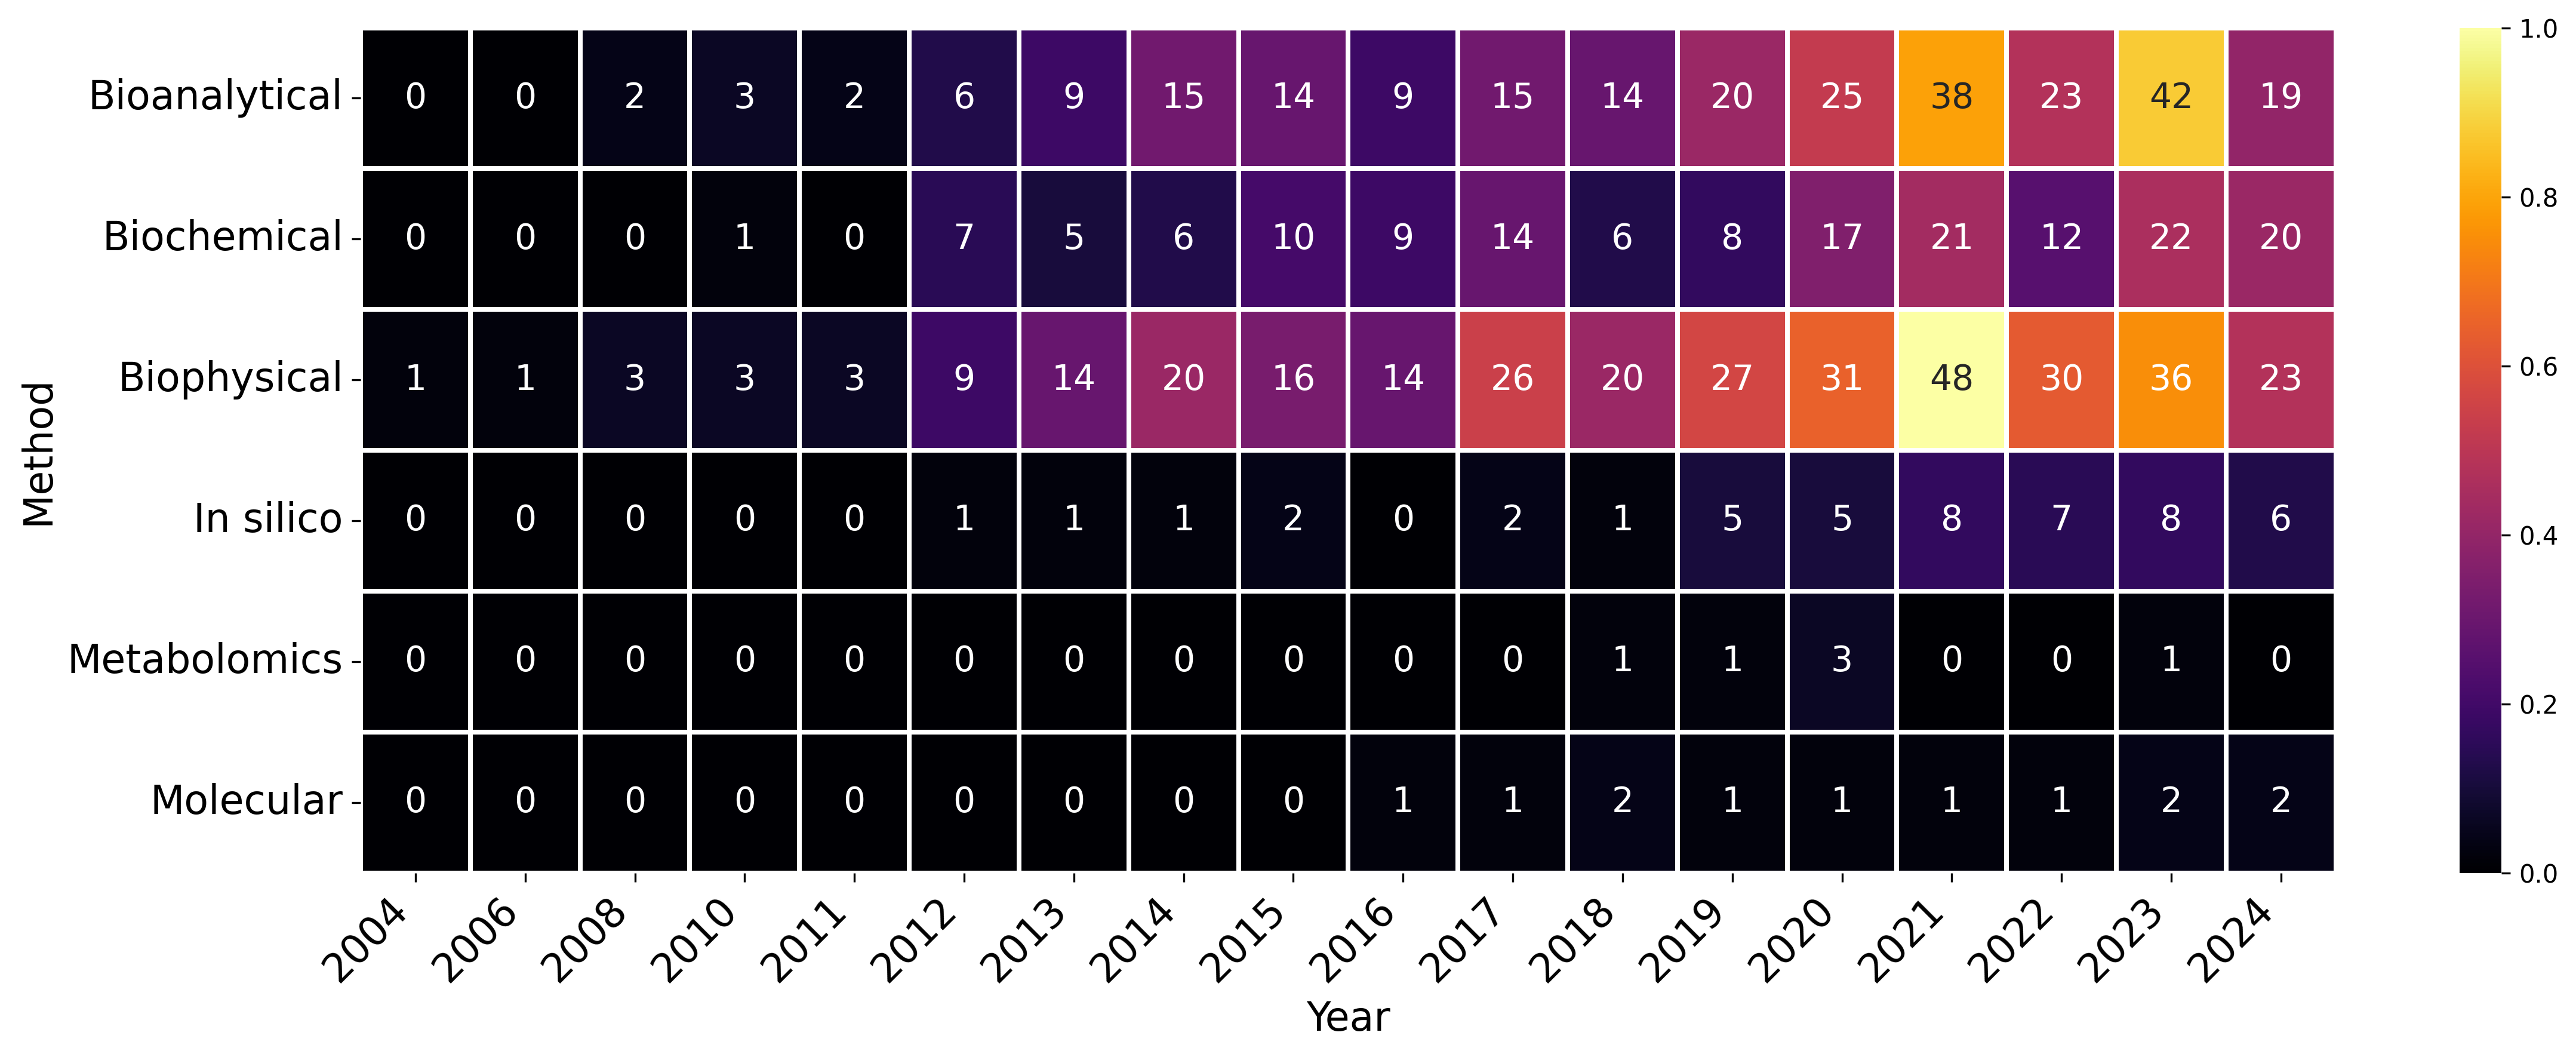

In [ ]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code for data loading and classification)

# ... (Your existing code up to the plotting section)

# Plot the horizontal heatmap with annotations
plt.figure(figsize=(16, 6), dpi=300)
sns.heatmap(normalized_heatmap_data.T, cmap="inferno", annot=heatmap_data.T, fmt="d", cbar=True, linewidths=1.5, vmin=0, vmax=1, annot_kws={"fontsize": 14}) # Use heatmap_data for annotations
#plt.title("Horizontal Heatmap of Trypanosoma and Bioanalytical Labels by Year (2010-2024)")
plt.xticks(rotation=45,ha='right', fontsize=16)  # Rotate x-axis labels for clarity
plt.yticks(rotation=360, ha='right', fontsize=16)  # Rotate x-axis labels for clarity
plt.xlabel("Year", fontsize=16)
plt.ylabel("Method", fontsize=16)
plt.rcParams["font.family"] = "Arial"
plt.tight_layout()
plt.show()